<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/ML_Jobsheet_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JOBSHEET 9 Machine Learning

Abdullah Shamil Basayev | TI 3B | 02

#🍆 Praktikum 1
k-Nearest Neighbors (kNN)

In [1]:
# Load data
import pandas as pd
data = pd.read_csv('/content/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Langkah 2 - Eksplorasi Data
Cek struktur data informasi deskriptif data

In [2]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


Langkah 3 - Visualisasi Data
Lakukan visualisasi data untuk mengetahui distribusi dan korelasi setiap fitur terhadap label.

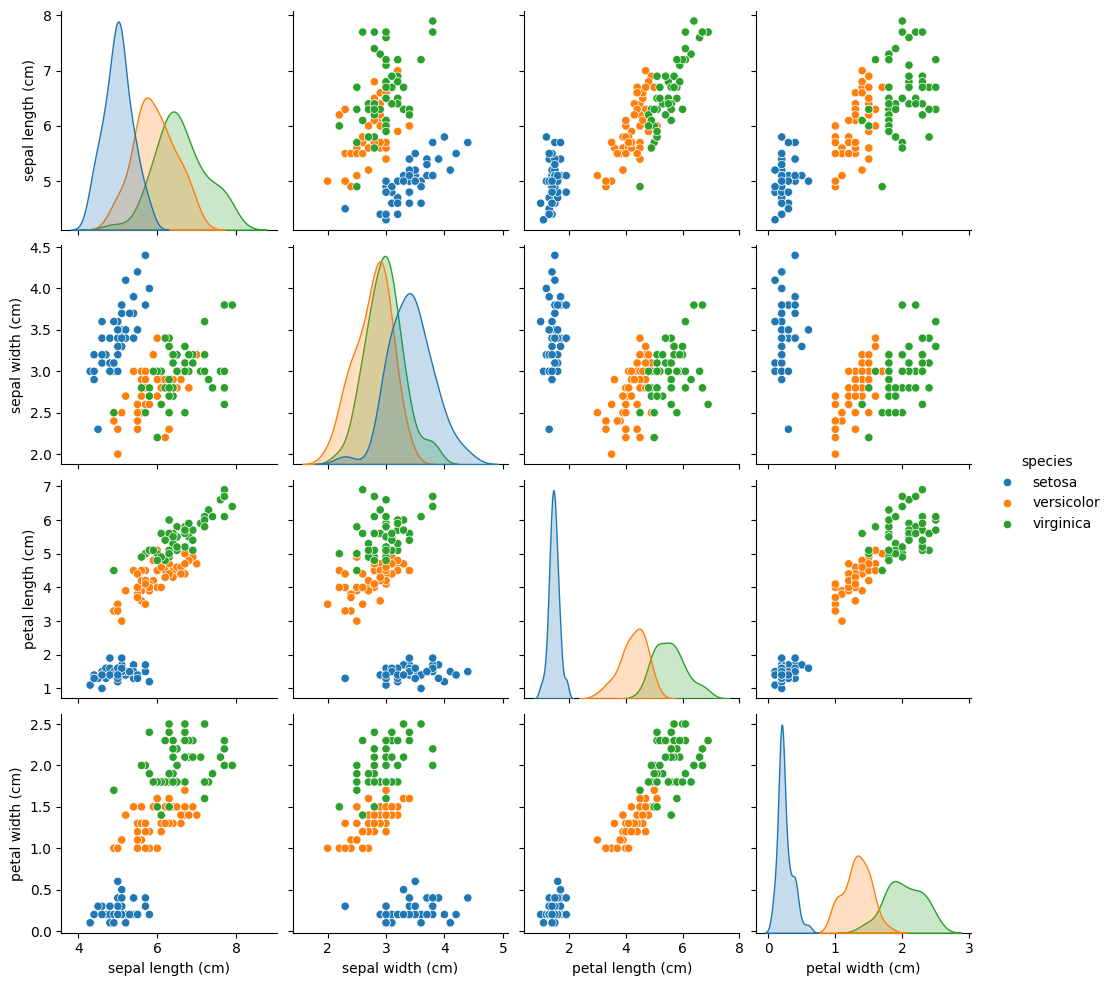

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

Langkah 4 - Preprocessing
Pada tahap ini, kita akan memisahkan antara label dengan fitur yang akan digunakan. Selain itu, untuk alasan pembelajaran, kita akan melakukan standardisasi dari fitur yang akan digunakan.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Langkah 5 - Buat Model kNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Langkah 6 - Evaluasi Model kNN
Pada tahap ini kita akan melakukan evaluasi terhadap model kNN yang telah dibuat sebelumnya. Metrik utama yang akan digunakan adalah akurasi dan detail analisis menggunakan confusion metrics.

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



mengevaluasi setiap nilai
k
k.

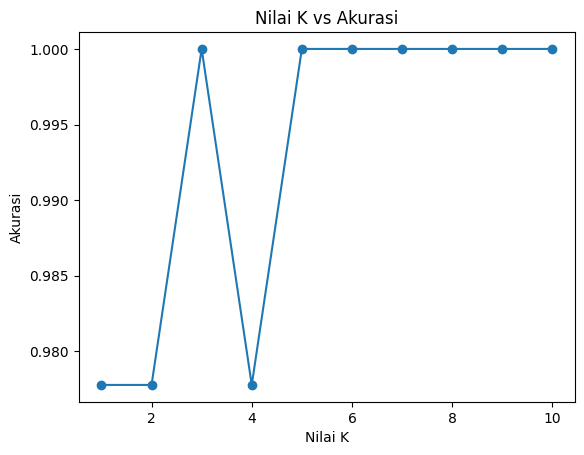

In [7]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


#🥒Praktikum 2
Klasifikasi Naive Bayes dengan Data Dummy

Langkah 1 - Buat Dataset Dummy

In [8]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[  5 101]
 [140 123]
 [328 123]
 [ 24 225]
 [181 125]
 [152  66]
 [ 56 115]
 [174 109]
 [ 66  56]
 [146 170]
 [210 269]
 [292 393]
 [ 98  97]
 [164 202]
 [143 160]
 [  9  62]
 [ 94  92]
 [ 77 107]
 [ 84  93]
 [136  28]
 [112  43]
 [ 95  81]
 [145  26]
 [ 49  30]
 [ 87  72]
 [127 147]
 [112 130]
 [102 115]
 [130 143]
 [153 156]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1]


#Langkah 2 (Opsional) - Membuat Data Frame
Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya.

In [9]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,5,101,0
1,140,123,0
2,328,123,0
3,24,225,0
4,181,125,0


Langkah 3 (Opsional) - Labeling
 Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [10]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,5,101,Kelas B
1,140,123,Kelas B
2,328,123,Kelas B
3,24,225,Kelas B
4,181,125,Kelas B


Langkah 4 - Visualisasi Data

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


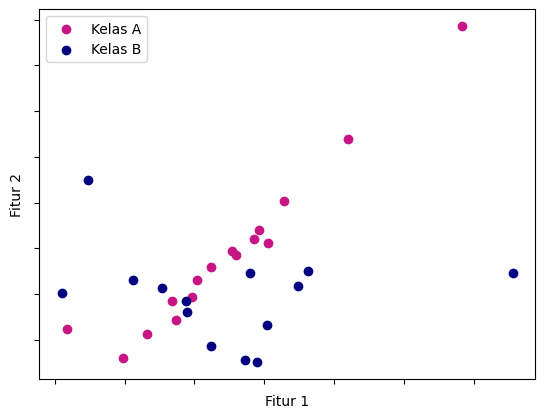

In [11]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Langkah 5 - Model Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8095238095238095
Hasil akurasi data test: 0.5555555555555556


Langkah 6 - Model Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.3333333333333333


#🥕 Praktikum 3
Klasifikasi Naive Bayes dengan Data Multimoda

Langkah 1 - Load Data

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Langkah 2 - Preprocessing

Beberapa hal yang akan dilakukan pada tahap ini yaitu,

Drop kolom yang tidak digunakan

Ubah nama kolom v1 (label) dan v2 (teks sms)

Inspeksi Data

Encode label

Memisahkan fitur dengan label

Langkah 2a - Drop Kolom

In [15]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Langkah 2b - Inspeksi Data

In [16]:
df = df.rename(columns={'v1': 'Labels', 'v2': 'SMS Text'})

# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   SMS Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                SMS Text
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Langkah 2c - Encoding Label

In [17]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Langkah 2d - Pisahkan Fitur dengan Label

In [18]:
X = df['SMS Text'].values
y = df['Labels'].values

Langkah 3 - Ekstraksi Fitur

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

Cek fitur dari proses CountVectorizer.

In [20]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


Langkah 4 - Training dan Evaluasi Model




In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


#TUGAS 1

In [24]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/voice.csv")
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Cell 2 — Eksplorasi awal & preprocessing

In [25]:
# Informasi dasar dataset
print(df.info())
print("\nJumlah kelas:\n", df['label'].value_counts())

# Encode label ke numerik: male = 1, female = 0
df['label'] = df['label'].map({'male': 1, 'female': 0})

# Cek missing values
print("\nMissing values per kolom:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Cell 3 — Split data & standarisasi

In [26]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Cell 4 — Eksperimen mencari fitur paling berpengaruh (feature importance via korelasi)

/tmp/ipython-input-1708981422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr.index, x=corr.values, palette='coolwarm')


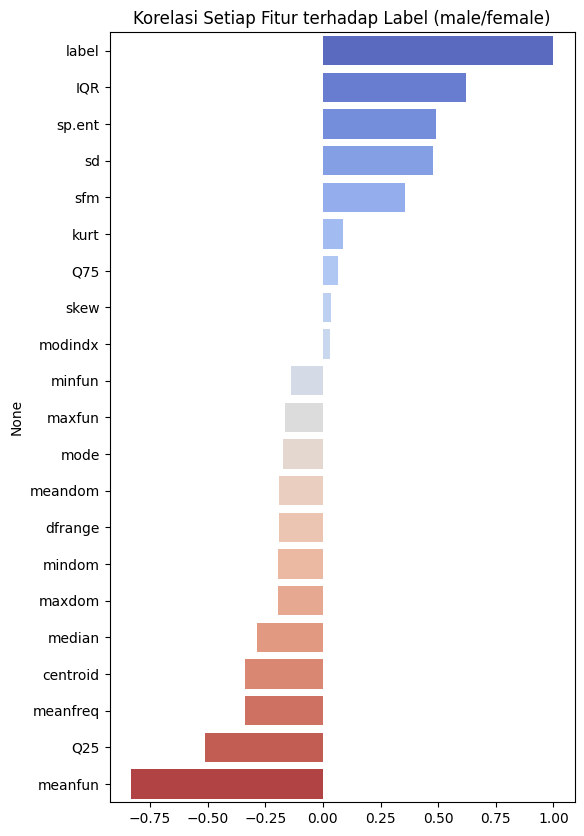

Fitur terpilih (|corr| > 0.3): ['IQR', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'Q25', 'meanfun']


In [27]:
# Cek korelasi fitur terhadap label
corr = df.corr()['label'].sort_values(ascending=False)
plt.figure(figsize=(6,10))
sns.barplot(y=corr.index, x=corr.values, palette='coolwarm')
plt.title("Korelasi Setiap Fitur terhadap Label (male/female)")
plt.show()

# Ambil fitur dengan korelasi absolut tinggi (misal > 0.3)
selected_features = corr[abs(corr) > 0.3].index.drop('label')
print("Fitur terpilih (|corr| > 0.3):", list(selected_features))


Cell 5 — Training kNN dengan semua fitur dan fitur terpilih

In [28]:
def evaluate_knn(X_train, X_test, y_train, y_test, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluasi dengan semua fitur
acc_all = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)
print("Akurasi dengan semua fitur:", acc_all)

# Evaluasi dengan fitur terpilih
X_sel_train = scaler.fit_transform(X_train[selected_features])
X_sel_test = scaler.transform(X_test[selected_features])
acc_sel = evaluate_knn(X_sel_train, X_sel_test, y_train, y_test)
print("Akurasi dengan fitur terpilih:", acc_sel)


Akurasi dengan semua fitur: 0.9763406940063092
Akurasi dengan fitur terpilih: 0.9810725552050473


Cell 6 — Pencarian nilai k terbaik (grafik analisis)

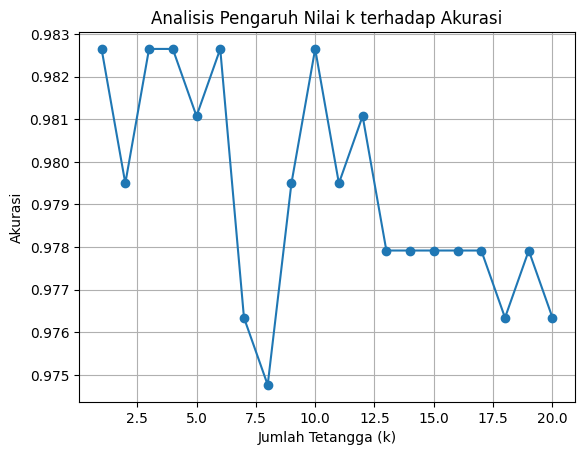

Nilai k terbaik: 1 dengan akurasi 0.9826


In [29]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    acc = evaluate_knn(X_sel_train, X_sel_test, y_train, y_test, k)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Jumlah Tetangga (k)")
plt.ylabel("Akurasi")
plt.title("Analisis Pengaruh Nilai k terhadap Akurasi")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Nilai k terbaik: {best_k} dengan akurasi {max(accuracies):.4f}")


Cell 7 — Evaluasi akhir model terbaik

Akurasi Akhir: 0.9826498422712934

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       317
           1       0.98      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



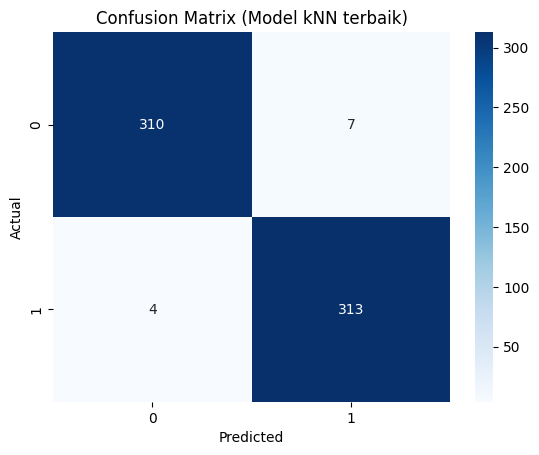

In [30]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_sel_train, y_train)
y_pred = best_knn.predict(X_sel_test)

print("Akurasi Akhir:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Model kNN terbaik)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#TUGAS 2

Cell 1 — Import library & load data

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

# Cek kolom yang tidak relevan (spam dataset sering memiliki kolom kosong tambahan)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Cell 2 — Preprocessing & split data

In [32]:
# Encode label: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

print("Data train:", len(X_train))
print("Data test :", len(X_test))


Data train: 4457
Data test : 1115


Cell 3 — Model MultinomialNB dengan CountVectorizer

Akurasi (CountVectorizer): 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



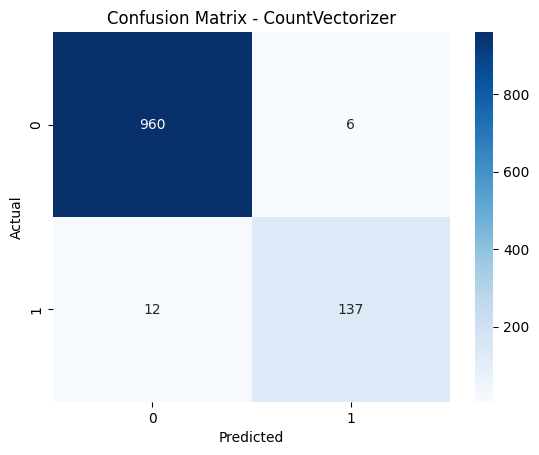

In [33]:
# Vectorizer dengan stop_words aktif
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Model Naive Bayes
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)

# Prediksi dan evaluasi
y_pred_cv = nb_cv.predict(X_test_cv)

acc_cv = accuracy_score(y_test, y_pred_cv)
print("Akurasi (CountVectorizer):", acc_cv)
print("\nClassification Report:\n", classification_report(y_test, y_pred_cv))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_cv), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CountVectorizer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Cell 4 — Model MultinomialNB dengan TF-IDF

Akurasi (TF-IDF): 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



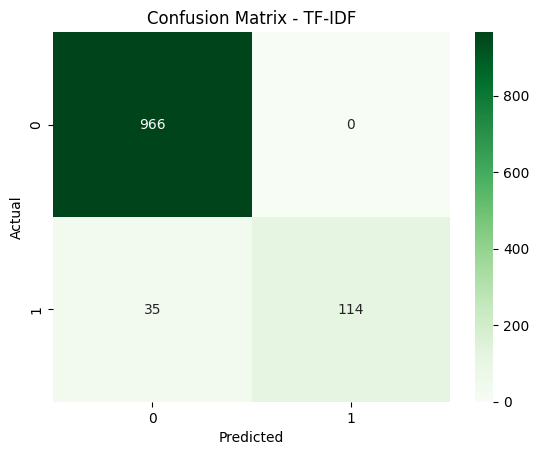

In [34]:
# Vectorizer TF-IDF dengan stop_words aktif
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Akurasi (TF-IDF):", acc_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Cell 5 — Perbandingan & Kesimpulan

In [35]:
print("Perbandingan Akurasi:")
print(f"CountVectorizer: {acc_cv:.4f}")
print(f"TF-IDF:          {acc_tfidf:.4f}")

if acc_tfidf > acc_cv:
    print("\n✅ TF-IDF menghasilkan performa lebih baik pada dataset spam.csv.")
    print("Alasan: TF-IDF memberi bobot lebih tinggi pada kata unik (informatif),")
    print("sehingga lebih efektif dalam membedakan pesan spam dan ham.")
else:
    print("\n✅ CountVectorizer lebih baik atau sebanding pada dataset ini.")
    print("Alasan: Fitur frekuensi mentah lebih sederhana, namun kadang cukup efektif")
    print("jika dataset memiliki kata kunci spam yang sangat sering muncul.")


Perbandingan Akurasi:
CountVectorizer: 0.9839
TF-IDF:          0.9686

✅ CountVectorizer lebih baik atau sebanding pada dataset ini.
Alasan: Fitur frekuensi mentah lebih sederhana, namun kadang cukup efektif
jika dataset memiliki kata kunci spam yang sangat sering muncul.
